<a href="https://colab.research.google.com/github/sarashahin/InflammatoryBowelDisease/blob/main/InflammatoryBowelDisease(IBD)BioResource.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/drive/MyDrive/Combined_2645_Samples_Genotypes.anon.csv.gz

Archive:  /content/drive/MyDrive/Combined_2645_Samples_Genotypes.anon.csv.gz
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/drive/MyDrive/Combined_2645_Samples_Genotypes.anon.csv.gz or
        /content/drive/MyDrive/Combined_2645_Samples_Genotypes.anon.csv.gz.zip, and cannot find /content/drive/MyDrive/Combined_2645_Samples_Genotypes.anon.csv.gz.ZIP, period.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# read in data
data1 = pd.read_csv('./drive/MyDrive/Combined_2645_Samples_Pedigree.csv', sep=",")
data1.head()
# sep=',', names= ['carat','cut','color','clarity','depth','table','price','x','y','z']

,Family_ID,Indiv_ID,Dad_ID,Mom_ID,Gender,Affectation,Disease
0,Fm8370858003_R03C02,8370858003_R03C02,0,0,1,2,CD
1,Fm8370858003_R06C01,8370858003_R06C01,0,0,1,2,CD
2,Fm6298194052_R01C01,6298194052_R01C01,0,0,2,2,CD
3,Fm7384449023_R01C02,7384449023_R01C02,0,0,1,2,CD
4,Fm8370858003_R02C02,8370858003_R02C02,0,0,2,2,CD


This dataframe has the following columns Family_ID, Dad_ID, Mom_ID (representing family history)

Gender: Male / Female using the convention 1=male, 2=female

(see PED file format here https://gatk.broadinstitute.org/hc/en-us/articles/360035531972-PED-Pedigree-format)

Affectation: 1 = Healthy control, 2 = Diseased (CD / UC or IBD)

Disease: CD / UC / IBD / Control

Let's see how these are distributed.


In [ ]:
#Set index as the individual id
IndivID_data = data1.set_index("Indiv_ID")
IndivID_data.head()

,Family_ID,Dad_ID,Mom_ID,Gender,Affectation,Disease
Indiv_ID,,,,,,
8370858003_R03C02,Fm8370858003_R03C02,0,0,1,2,CD
8370858003_R06C01,Fm8370858003_R06C01,0,0,1,2,CD
6298194052_R01C01,Fm6298194052_R01C01,0,0,2,2,CD
7384449023_R01C02,Fm7384449023_R01C02,0,0,1,2,CD
8370858003_R02C02,Fm8370858003_R02C02,0,0,2,2,CD


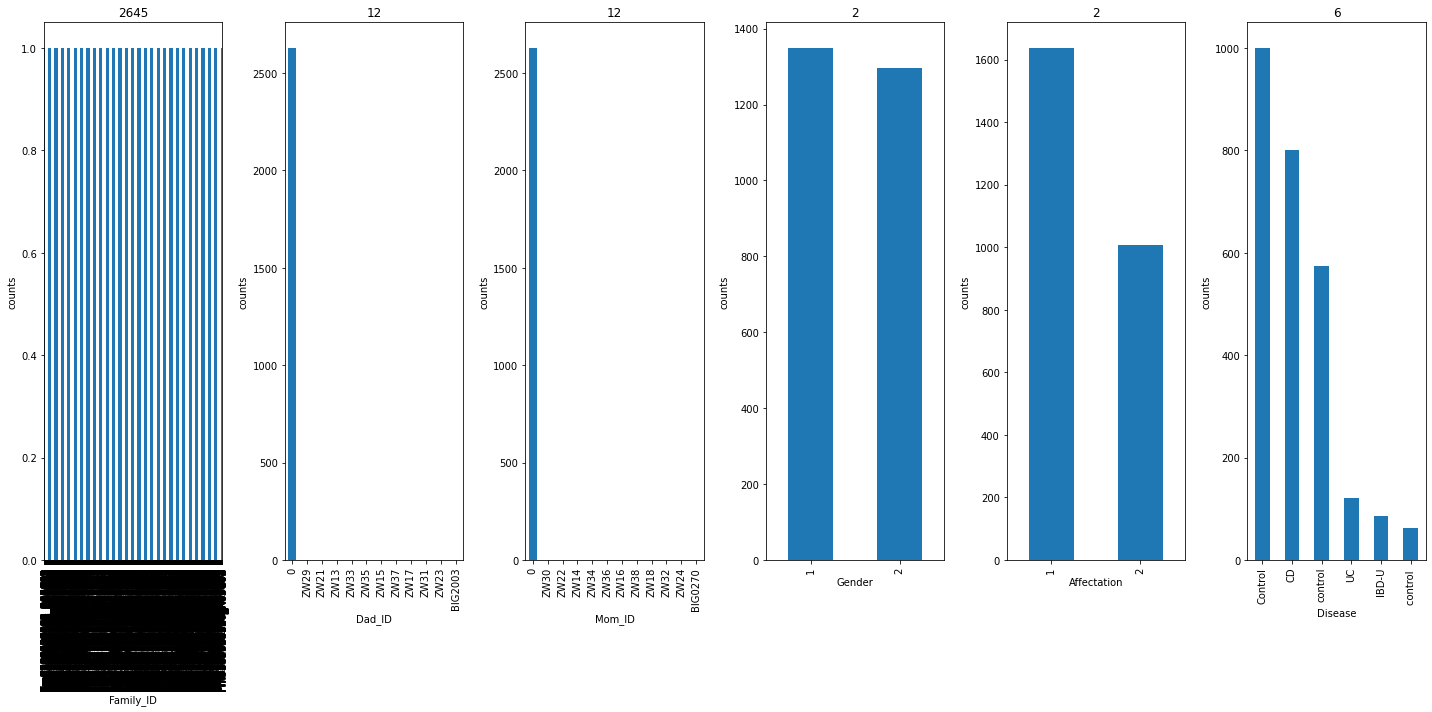

In [ ]:
#Setup the subplots object
plt.subplots(1,6, figsize = (20,10))

#Create a counter
counter = 0

#loop over the first few columns in the data frame
for column in IndivID_data.columns:
    
    #increment counter
    counter+=1
    
    #plot the first subplot
    plt.subplot(1,6,counter)
    
    #label axes
    plt.xlabel(column)
    plt.ylabel("counts")
    plt.title(IndivID_data[column].nunique())
    
    #plot the value counts
    IndivID_data[column].value_counts().plot(kind='bar')

#Cleanly display the figure
plt.tight_layout()

#Show the figure
plt.show()

In [ ]:
#drop unnecessary columns
IndivID_data.drop(["Family_ID","Dad_ID", "Mom_ID", "Disease"], axis='columns', inplace = True)

#View the dataframe
IndivID_data.head()

,Gender,Affectation
Indiv_ID,,
8370858003_R03C02,1,2
8370858003_R06C01,1,2
6298194052_R01C01,2,2
7384449023_R01C02,1,2
8370858003_R02C02,2,2


In [ ]:
# Use the describe function to get summary statistics of the numerical columns in the data.

IndivID_data.describe()

,Gender,Affectation
count,2645.000000,2645.000000
mean,1.489981,1.381096
std,0.499994,0.485748
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,2.000000,2.000000


In [ ]:
# Check for missing values using the isnull function and the sum function to see how many missing values there are in each column.

IndivID_data.isnull().sum()


Gender         0
Affectation    0
dtype: int64

In [ ]:
# drop rows with missing values
data = IndivID_data.dropna()

# remove duplicates
data = IndivID_data.drop_duplicates()

# reset index
data = IndivID_data.reset_index(drop=True)
data.head()
data.columns

Index(['Gender', 'Affectation'], dtype='object')

In [ ]:
# To impute missing values with the mean or median of the column,
#  you can use the fillna function and specify the value you want to use to fill in the missing values.

data = data.fillna(data.mean())
data



,Gender,Affectation
0,1,2
1,1,2
2,2,2
3,1,2
4,2,2
...,...,...
2640,2,2
2641,2,2
2642,1,2
2643,1,2


In [ ]:
data.shape

(2645, 2)

In [ ]:
# data manipulation tasks
filtered_data = data[(data['Gender'] == 1) & (data['Affectation'] == 2)]
filtered_data

,Gender,Affectation
0,1,2
1,1,2
3,1,2
8,1,2
9,1,2
...,...,...
2631,1,2
2633,1,2
2634,1,2
2642,1,2


In [ ]:
grouped_data = data.groupby(['Gender', 'Affectation']).size().reset_index(name='count')
grouped_data

,Gender,Affectation,count
0,1,1,751
1,1,2,598
2,2,1,886
3,2,2,410


In [ ]:
pivot_table = data.pivot_table(index='Gender', columns='Affectation', aggfunc='size')
pivot_table

Affectation,1,2
Gender,,
1,751,598
2,886,410


In [ ]:
# Pearson correlation coefficient between the Gender and Affectation columns.
#  This will give you a measure of the strength and direction of the linear relationship between the variables.

corr_matrix = data[['Affectation', 'Gender']].corr()
print(corr_matrix)



             Affectation    Gender
Affectation     1.000000 -0.130656
Gender         -0.130656  1.000000


In [ ]:
# T-test: You can use the ttest_ind function from the scipy.stats library to perform a t-test to compare the means of the Affectation column
#  for males and females. This can be used to determine if there is a significant difference between the means of the two groups.

#  Gender 1 is Male and Gender 2 is Female
from scipy.stats import ttest_ind

male = data[data['Gender'] == 1]['Affectation']
female = data[data['Gender'] == 2]['Affectation']
t_stat, p_value = ttest_ind(male, female)
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Determine whether there is a significant difference between the means
if p_value < 0.05:
    print("There is a significant difference between the means of Affectation values for males and females.")
else:
    print("There is no significant difference between the means of Affectation values for males and females.")


t-statistic: 6.7751194278643
p-value: 1.5267000375777402e-11
There is a significant difference between the means of Affectation values for males and females.


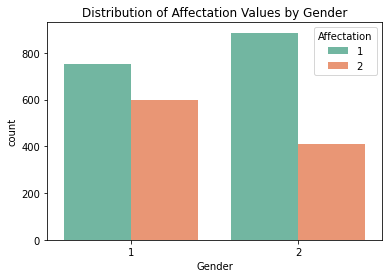

In [ ]:
import seaborn as sns


# Set plot size and resolution
# plt.figure(figsize=(10, 6), dpi=100)
sns.countplot(x='Gender', hue='Affectation', data=data, palette='Set2')

# Add title
plt.title('Distribution of Affectation Values by Gender')

# Show plot
plt.show()


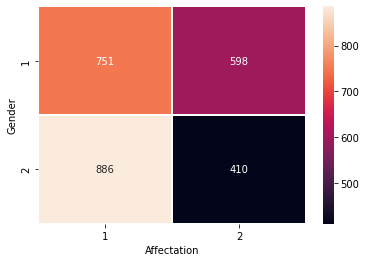

In [ ]:
import seaborn as sns

counts = data.groupby(['Gender', 'Affectation']).size().reset_index(name='counts')
counts_pivot = counts.pivot(index='Gender', columns='Affectation', values='counts')
sns.heatmap(counts_pivot, annot=True, fmt='d', linewidths=0.5)



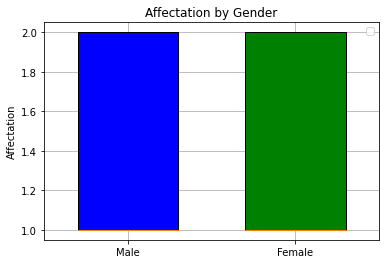

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()
bp1 = ax.boxplot(data[data['Gender'] == 1]['Affectation'], positions=[1], widths=0.6, patch_artist=True)
bp2 = ax.boxplot(data[data['Gender'] == 2]['Affectation'], positions=[2], widths=0.6, patch_artist=True)

for box in bp1['boxes']:
    box.set_facecolor('blue')
    box.set_edgecolor('black')
for box in bp2['boxes']:
    box.set_facecolor('green')
    box.set_edgecolor('black')
    
ax.set_xticks([1, 2])
ax.set_xticklabels(['Male', 'Female'])
ax.set_ylabel('Affectation')
ax.set_title('Affectation by Gender')
ax.legend()
ax.grid(True)
plt.show()






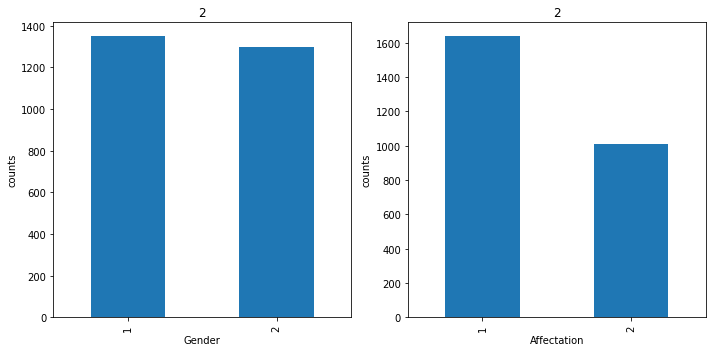

<Figure size 200x120 with 0 Axes>

In [ ]:
#Setup the subplots object
plt.subplots(1,6, figsize = (10,5))

#Create a counter
counter = 0

#loop over the first few columns in the data frame
for column in data.columns:
    
    #increment counter
    counter+=1
    
    #plot the first subplot
    plt.subplot(1,2,counter)
    
    #label axes
    plt.xlabel(column)
    plt.ylabel("counts")
    plt.title(data[column].nunique())
    
    #plot the value counts
    data[column].value_counts().plot(kind='bar')

#Cleanly display the figure
plt.tight_layout()
plt.figure(figsize=(10, 6), dpi=20)
#Show the figure
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
data['cluster'] = kmeans.labels_
data['cluster']

0       0
1       0
2       0
3       0
4       0
       ..
2640    0
2641    0
2642    0
2643    0
2644    0
Name: cluster, Length: 2645, dtype: int32

In [ ]:
# Regression analysis: You can use the OLS function from the statsmodels library to fit a multiple linear regression model to the data.
# This will allow you to predict the value of a dependent variable based on the values of multiple independent variables

import statsmodels.api as sm

X = data[['Affectation']]
y = data['Gender']
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                 Gender   R-squared (uncentered):                   0.775
Model:                            OLS   Adj. R-squared (uncentered):              0.775
Method:                 Least Squares   F-statistic:                              9130.
Date:                Tue, 27 Dec 2022   Prob (F-statistic):                        0.00
Time:                        00:25:06   Log-Likelihood:                         -2973.6
No. Observations:                2645   AIC:                                      5949.
Df Residuals:                    2644   BIC:                                      5955.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------